Part 1

Running sim...
Simulation complete.
Averages for LOESS, NW, Spline:  -0.005668723386424018 0.0009757357622461526 0.0009942186848955477
Bias for LOESS, NW, Spline:  0.22274203153283037 0.011002039467617944 0.2076413437752828
Variance for LOESS, NW, Spline:  0.001131387056521462 0.007260221401156868 0.0016369390289678852
MSE for LOESS, NW, Spline:  0.10692015796588376 0.0076052249817304615 0.10529339780674815
Simulation complete.
Averages for LOESS, NW, Spline:  -0.005668723386424018 0.0009757357622461526 0.0009942186848955477
Bias for LOESS, NW, Spline:  0.22274203153283037 0.011002039467617944 0.2076413437752828
Variance for LOESS, NW, Spline:  0.001131387056521462 0.007260221401156868 0.0016369390289678852
MSE for LOESS, NW, Spline:  0.10692015796588376 0.0076052249817304615 0.10529339780674815


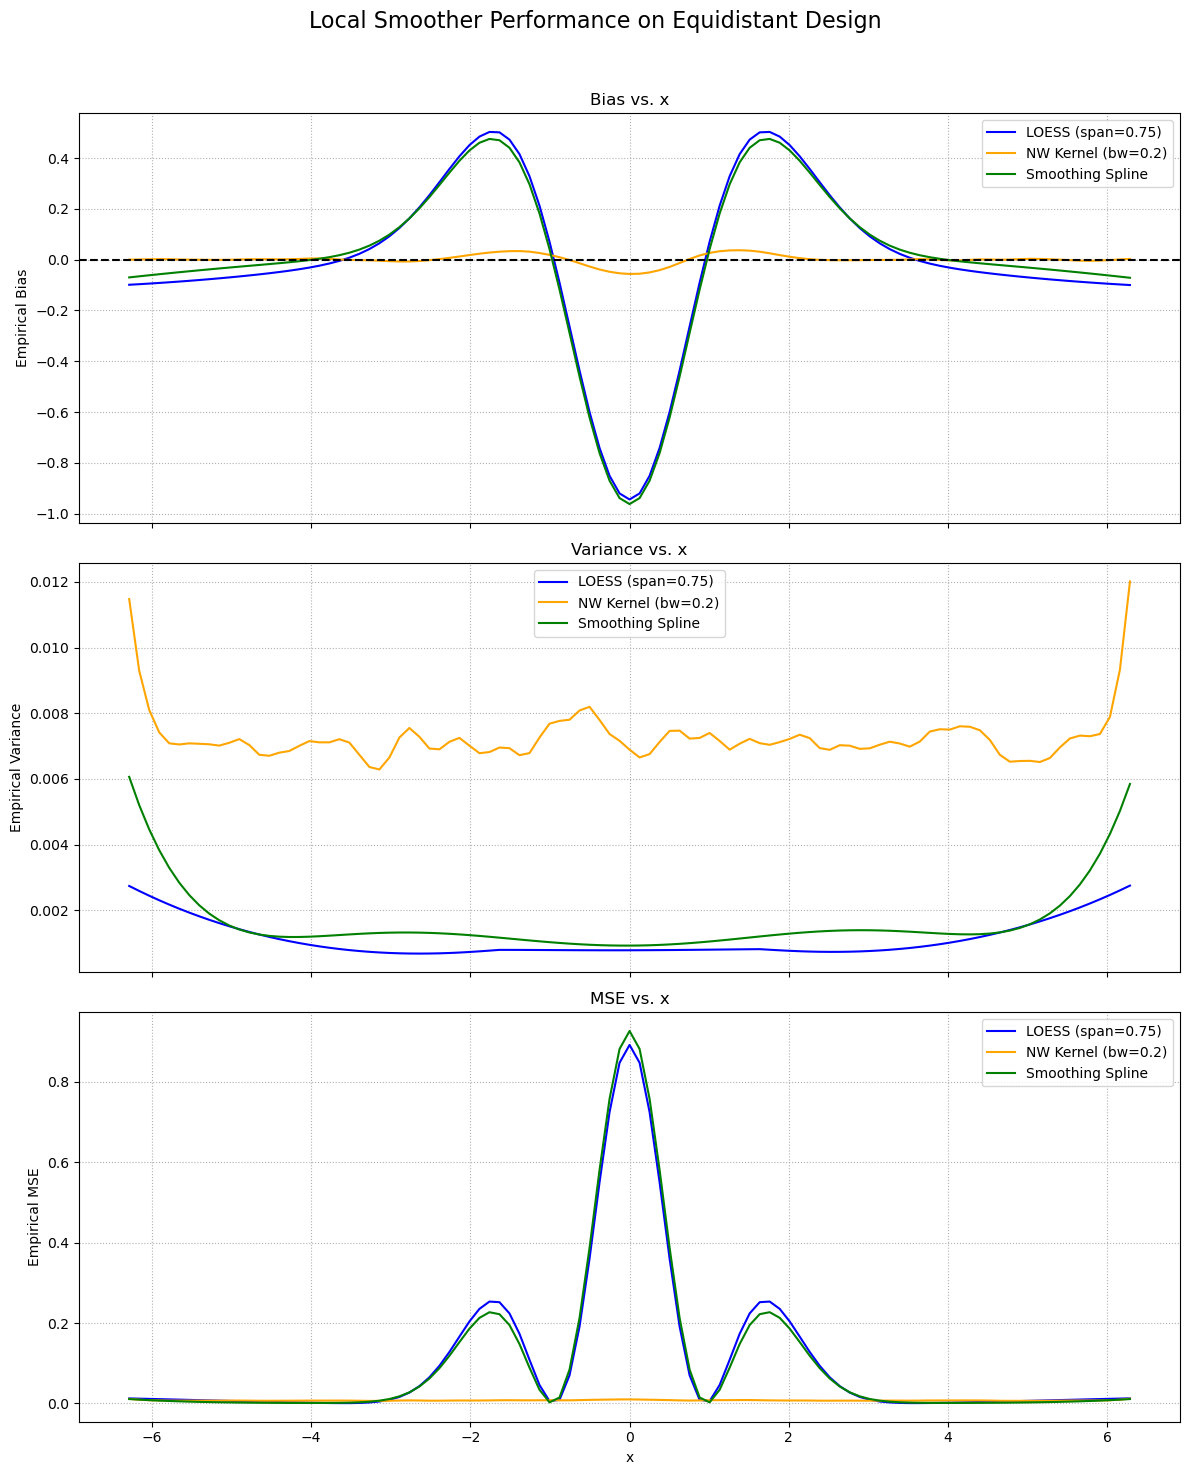

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.nonparametric.smoothers_lowess import lowess
from statsmodels.nonparametric.kernel_regression import KernelReg
from scipy.interpolate import UnivariateSpline

# Part 1: Equidistant Design
# 1a) Setting up simulation parameters and design points
m = 1000
n = 101
x1 = np.linspace(-2 * np.pi, 2 * np.pi, n)

def f_true(x): # true Mexican Hat function
    return (1-x**2) * np.exp(-0.5 * x**2)

fx_true1 = f_true(x1)

# Initializing matrices to store results from each run
loess_fit = np.zeros((n,m))
nw_fit = np.zeros((n,m))
spline_fit = np.zeros((n,m))

# 1b) Monte Carlo simulation
print("Running sim...")
for j in range(m):
    y = fx_true1 + np.random.normal(loc=0, scale=0.2, size=n) # adding noise
    
    # LOESS
    loess_result = lowess(y, x1, frac=0.75, it=0, return_sorted=False)
    loess_fit[:, j] = loess_result
    
    # Nadaraya-Watson with bandwith of 0.2 and Gaussian kernel
    nw_model = KernelReg(endog=y, exog=x1, var_type='c', reg_type='lc', bw=[0.2])
    nw_result, _ = nw_model.fit(x1)
    nw_fit[:, j] = nw_result
    
    # Smoothing Spline (seen in 7.2.3 py code)
    spline = UnivariateSpline(x1, y, s=None)
    spline_result = spline(x1)
    spline_fit[:, j] = spline_result
print("Simulation complete.")
# 1c) Calculating empirical bias, variance and MSE
# Calculating means across simulations
mean_loess = np.mean(loess_fit, axis=1)
mean_nw = np.mean(nw_fit, axis=1)
mean_spline = np.mean(spline_fit, axis=1)
print("Averages for LOESS, NW, Spline: ", np.mean(mean_loess), np.mean(mean_nw), np.mean(mean_spline))

# Calculating bias
bias_loess = mean_loess - fx_true1
bias_nw = mean_nw - fx_true1
bias_spline = mean_spline - fx_true1
print("Bias for LOESS, NW, Spline: ", np.mean(np.abs(bias_loess)), np.mean(np.abs(bias_nw)), np.mean(np.abs(bias_spline)))

# Calculating variance
var_loess = np.mean((loess_fit - mean_loess[:, np.newaxis]) ** 2, axis=1)
var_nw = np.mean((nw_fit - mean_nw[:, np.newaxis]) ** 2, axis=1)
var_spline = np.mean((spline_fit - mean_spline[:, np.newaxis]) ** 2, axis=1)
print("Variance for LOESS, NW, Spline: ", np.mean(var_loess), np.mean(var_nw), np.mean(var_spline))

# Calculating MSE
mse_loess = np.mean((loess_fit - fx_true1[:, np.newaxis]) ** 2, axis=1)
mse_nw = np.mean((nw_fit - fx_true1[:, np.newaxis]) ** 2, axis=1)
mse_spline = np.mean((spline_fit - fx_true1[:, np.newaxis]) ** 2, axis=1)
print("MSE for LOESS, NW, Spline: ", np.mean(mse_loess), np.mean(mse_nw), np.mean(mse_spline))

# 1d) Plotting the results
fig, axs = plt.subplots(3, 1, figsize=(12, 15), sharex=True)
fig.suptitle('Local Smoother Performance on Equidistant Design', fontsize=16)

# Bias plot
axs[0].plot(x1, bias_loess, label='LOESS (span=0.75)', color='blue')
axs[0].plot(x1, bias_nw, label='NW Kernel (bw=0.2)', color='orange')
axs[0].plot(x1, bias_spline, label='Smoothing Spline', color='green')
axs[0].axhline(0, color='black', linestyle='--')
axs[0].set_ylabel('Empirical Bias')
axs[0].set_title('Bias vs. x')
axs[0].legend()
axs[0].grid(True, linestyle=':')

# Variance plot
axs[1].plot(x1, var_loess, label='LOESS (span=0.75)', color='blue')
axs[1].plot(x1, var_nw, label='NW Kernel (bw=0.2)', color='orange')
axs[1].plot(x1, var_spline, label='Smoothing Spline', color='green')
axs[1].set_ylabel('Empirical Variance')
axs[1].set_title('Variance vs. x')
axs[1].legend()
axs[1].grid(True, linestyle=':')

# MSE plot
axs[2].plot(x1, mse_loess, label='LOESS (span=0.75)', color='blue')
axs[2].plot(x1, mse_nw, label='NW Kernel (bw=0.2)', color='orange')
axs[2].plot(x1, mse_spline, label='Smoothing Spline', color='green')
axs[2].set_ylabel('Empirical MSE')
axs[2].set_title('MSE vs. x')
axs[2].set_xlabel('x')
axs[2].legend()
axs[2].grid(True, linestyle=':')

plt.tight_layout(rect=(0, 0, 1, 0.96))
plt.show()


Part 2

Running non-equidistant sim...
Simulation complete.
Averages for LOESS, NW, Spline:  0.0967945106087807 0.15443374975281354 0.11696856652504299
Bias for LOESS, NW, Spline:  0.22274203153283037 0.011002039467617944 0.2076413437752828
Variance for LOESS, NW, Spline:  0.0022571211585523136 0.007034465695998301 0.004047841426464795
MSE for LOESS, NW, Spline:  0.030711357444221765 0.007794974314710082 0.035809281508015586
Simulation complete.
Averages for LOESS, NW, Spline:  0.0967945106087807 0.15443374975281354 0.11696856652504299
Bias for LOESS, NW, Spline:  0.22274203153283037 0.011002039467617944 0.2076413437752828
Variance for LOESS, NW, Spline:  0.0022571211585523136 0.007034465695998301 0.004047841426464795
MSE for LOESS, NW, Spline:  0.030711357444221765 0.007794974314710082 0.035809281508015586


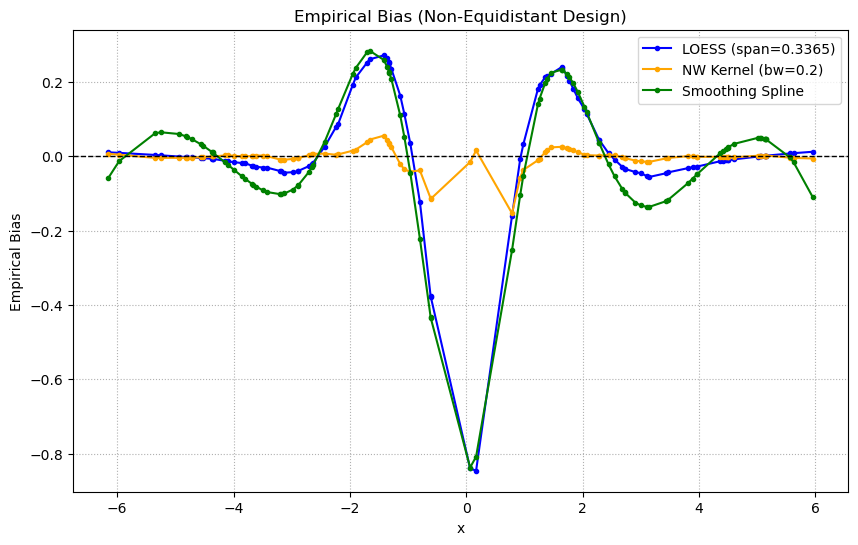

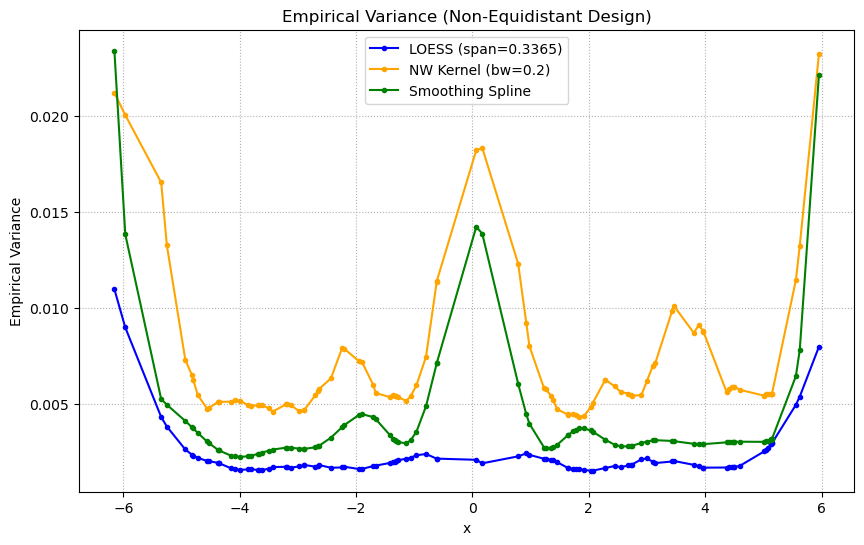

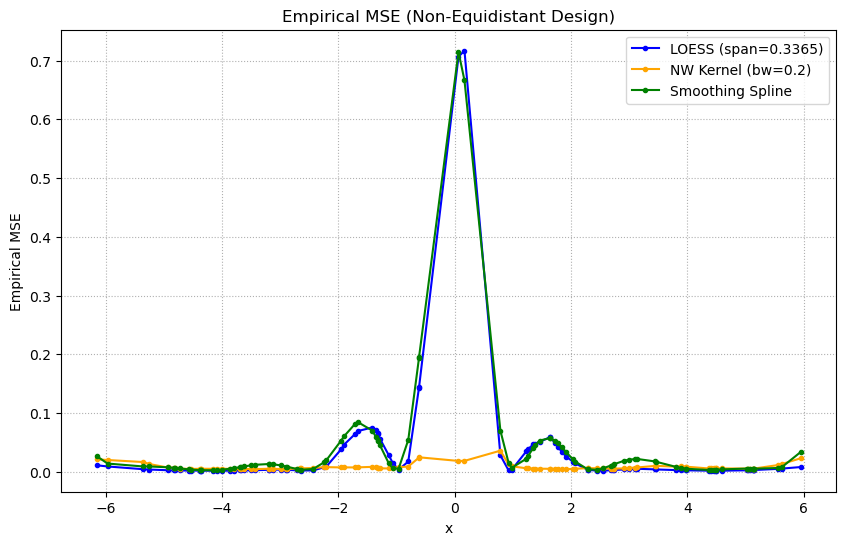

In [39]:
# Part 2: Non-Equidistant Design

# 2a. Setting up non-equidistant design points
try:
    x2 = pd.read_csv('HW04part2-1.x.csv')
    x2_values = x2['x'].values
except FileNotFoundError:
    print("Error: File not found")
    x2_values = None

if x2_values is not None:
    sort_order = np.argsort(x2_values)
    x2 = x2_values[sort_order]
    n2 = len(x2)
    fx_true2 = f_true(x2)

    # Initializing matrices to store results from each run
    loess_fit2 = np.zeros((n2,m))
    nw_fit2 = np.zeros((n2,m))
    spline_fit2 = np.zeros((n2,m))

    print("Running non-equidistant sim...")
    for j in range(m):
        y_unsorted = f_true(x2_values) + np.random.normal(0, 0.2, n2) # adding noise
        # Then sort y to match the sorted x2 array for the smoothing functions
        y = y_unsorted[sort_order]

        # LOESS with span = 0.3365
        loess_fit2[:, j] = lowess(y, x2, frac=0.3365, it=0, return_sorted=False)

        # NW with bandwith of 0.2
        nw_model2 = KernelReg(endog=y, exog=x2, var_type='c', reg_type='lc', bw=[0.2])
        nw_result2, _ = nw_model2.fit(x2)
        nw_fit2[:, j] = nw_result2

        # Smoothing Spline with spar = 0.7163 (approximated to s=1.5 for R->Python)
        spline_model2 = UnivariateSpline(x2, y, s=7)
        spline_fit2[:, j] = spline_model2(x2)
    print("Simulation complete.")

    # 2c) Calculating empirical bias, variance and MSE
    mean_loess2 = np.mean(loess_fit2, axis=1)
    mean_nw2 = np.mean(nw_fit2, axis=1)
    mean_spline2 = np.mean(spline_fit2, axis=1)
    print("Averages for LOESS, NW, Spline: ", np.mean(np.abs(mean_loess2)), np.mean(np.abs(mean_nw2)), np.mean(np.abs(mean_spline2)))

    # Calculating bias
    bias_loess2 = mean_loess2 - fx_true2
    bias_nw2 = mean_nw2 - fx_true2
    bias_spline2 = mean_spline2 - fx_true2
    print("Bias for LOESS, NW, Spline: ", np.mean(np.abs(bias_loess)), np.mean(np.abs(bias_nw)), np.mean(np.abs(bias_spline)))

    var_loess2 = np.mean((loess_fit2 - mean_loess2[:, np.newaxis]) ** 2, axis=1)
    var_nw2 = np.mean((nw_fit2 - mean_nw2[:, np.newaxis]) ** 2, axis=1)
    var_spline2 = np.mean((spline_fit2 - mean_spline2[:, np.newaxis]) ** 2, axis=1)
    print("Variance for LOESS, NW, Spline: ", np.mean(var_loess2), np.mean(var_nw2), np.mean(var_spline2))

    mse_loess2 = np.mean((loess_fit2 - fx_true2[:, np.newaxis]) ** 2, axis=1)
    mse_nw2 = np.mean((nw_fit2 - fx_true2[:, np.newaxis]) ** 2, axis=1)
    mse_spline2 = np.mean((spline_fit2 - fx_true2[:, np.newaxis]) ** 2, axis=1)
    print("MSE for LOESS, NW, Spline: ", np.mean(mse_loess2), np.mean(mse_nw2), np.mean(mse_spline2))

    # 2d) Plotting the results
    # Empirical bias plot
    plt.figure(figsize=(10, 6))
    plt.plot(x2, bias_loess2, 'o-', markersize=3, label='LOESS (span=0.3365)', color='blue')
    plt.plot(x2, bias_nw2, 'o-', markersize=3, label='NW Kernel (bw=0.2)', color='orange')
    plt.plot(x2, bias_spline2, 'o-', markersize=3, label='Smoothing Spline', color='green')
    plt.axhline(0, color='black', linestyle='--', lw=1)
    plt.title('Empirical Bias (Non-Equidistant Design)')
    plt.xlabel('x')
    plt.ylabel('Empirical Bias')
    plt.legend()
    plt.grid(True, linestyle=':')
    plt.show()

    # Empirical variance plot
    plt.figure(figsize=(10, 6))
    plt.plot(x2, var_loess2, 'o-', markersize=3, label='LOESS (span=0.3365)', color='blue')
    plt.plot(x2, var_nw2, 'o-', markersize=3, label='NW Kernel (bw=0.2)', color='orange')
    plt.plot(x2, var_spline2, 'o-', markersize=3, label='Smoothing Spline', color='green')
    plt.title('Empirical Variance (Non-Equidistant Design)')
    plt.xlabel('x')
    plt.ylabel('Empirical Variance')
    plt.legend()
    plt.grid(True, linestyle=':')
    plt.show()

    # Empirical MSE plot
    plt.figure(figsize=(10, 6))
    plt.plot(x2, mse_loess2, 'o-', markersize=3, label='LOESS (span=0.3365)', color='blue')
    plt.plot(x2, mse_nw2, 'o-', markersize=3, label='NW Kernel (bw=0.2)', color='orange')
    plt.plot(x2, mse_spline2, 'o-', markersize=3, label='Smoothing Spline', color='green')
    plt.title('Empirical MSE (Non-Equidistant Design)')
    plt.xlabel('x')
    plt.ylabel('Empirical MSE')
    plt.legend()
    plt.grid(True, linestyle=':')
    plt.show()


